
# Collateralized Exposure 

This dashboard demonstrates the modelling of collateral in exposure simulations 
- Portfolio: EUR, USD and GBP Swaps
- Analytics: Exposure simulation and XVA, bi-weekly time grid

Prerequisites:
- This notebook assumes a standard installation of Python 3
- ORE Python module installed: run "pip install osre" to get the latest version

## Launch ORE

Kick off a process in ORE, loading all inputs from Input/ore.xml and the files referenced therein. 
This is equivalent to using the ORE command line application.

In [ ]:
import sys, time, math
import utilities
from OREAnalytics import *

print ("Load parameters")
params = Parameters()
params.fromFile("Input/ore.xml")

print ("Create OREApp")
ore = OREApp(params)

This should have loaded the main inputs
- portfolio
- today's market configuration
- conventions
- curve configrations
- pricing engine configuration

In [ ]:
portfolio = ore.getInputs().portfolio()
print("Portfolio size:", portfolio.size())
for id in portfolio.ids():
    trade = portfolio.get(id)
    print("Trade id", id, "type", trade.tradeType())
#portfolioXML = portfolio.toXMLString()
#print(portfolioXML)

Kick off the ORE process:

In [ ]:
print ("Run the ORE process");
ore.run()

## Uncollateralized Exposure

In [ ]:
utilities.writeReportList(ore.getReportNames())

Plot EPE and ENE, single trades and netting set: 

In [ ]:
report_nocol = ore.getReport("exposure_nettingset_CPTY_A")
report_1 = ore.getReport("exposure_trade_Swap_1")
report_2 = ore.getReport("exposure_trade_Swap_2")
report_3 = ore.getReport("exposure_trade_Swap_3")

In [ ]:
time = report_1.dataAsReal(2)
epe_1 = report_1.dataAsReal(3);
ene_1 = report_1.dataAsReal(4);
epe_2 = report_2.dataAsReal(3);
ene_2 = report_2.dataAsReal(4);
epe_3 = report_3.dataAsReal(3);
ene_3 = report_3.dataAsReal(4);
epe_nocol = report_nocol.dataAsReal(3);
ene_nocol = report_nocol.dataAsReal(4);
    
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.plot(time, epe_nocol, label='Netting Set')
ax0.plot(time, epe_1, label='Swap 1')
ax0.plot(time, epe_2, label='Swap 2')
ax0.plot(time, epe_3, label='Swap 3')
ax0.set(xlabel='Time/Years')
ax0.set(ylabel='Exposure')
ax0.set_title('EPE')
ax0.legend()

ax1.plot(time, ene_nocol, label='Netting Set')
ax1.plot(time, ene_1, label='Swap 1')
ax1.plot(time, ene_2, label='Swap 2')
ax1.plot(time, ene_3, label='Swap 3')
ax1.set(xlabel='Time/Years')
ax1.set(ylabel='Exposure')
ax1.set_title('ENE')
ax1.legend()

plt.show()

# Cash Collateral with Non-Zero Threshold

We have prepared a second configuration for this case, see
- ore_threshhold.xml 
- netting_threshold.xml

We re-run ORE now, but we do not need to generate the NPV cube again. We load the cube from our previous run. This allows quickly exploring alternative collateral settings in separate post-processor runs. We use a separate ORE instance here to keep all previous results.

In [ ]:
xml = "Input/ore_threshold.xml"
print ("Run ORE for", xml)
params = Parameters()
params.fromFile(xml)
ore_threshold = OREApp(params)
ore_threshold.run()

In [ ]:
report_th = ore_threshold.getReport("exposure_nettingset_CPTY_A")

In [ ]:
time = report_nocol.dataAsReal(2)
epe_th = report_th.dataAsReal(3);
ene_th = report_th.dataAsReal(4);
    
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.plot(time, epe_nocol, label='No Collateral')
ax0.plot(time, epe_th, label='With Collateral')
ax0.set(xlabel='Time/Years')
ax0.set(ylabel='EPE')
ax0.set_title('Exposure with Collateral and Threshold > 0')
ax0.legend()

ax1.plot(time, ene_nocol, label='No Collateral')
ax1.plot(time, ene_th, label='With Collateral')
ax1.set(xlabel='Time/Years')
ax1.set(ylabel='ENE')
ax1.set_title('Exposure with Collateral and Threshold > 0')
ax1.legend()

plt.show()

# Cash Collateral with Zero Threshold and Non-Zero MTA

We have prepared another configuration for this case, see
- ore_mta.xml 
- netting_mta.xml

Re-run the post-processor:

In [ ]:
xml = "Input/ore_mta.xml"
print ("Run ORE for", xml)
params = Parameters()
params.fromFile(xml)
ore_mta = OREApp(params)
ore_mta.run()

In [ ]:
report_mta = ore_mta.getReport("exposure_nettingset_CPTY_A")

In [ ]:
time = report_nocol.dataAsReal(2)
epe_mta = report_mta.dataAsReal(3);
ene_mta = report_mta.dataAsReal(4);
    
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.plot(time, epe_nocol, label='No Collateral')
ax0.plot(time, epe_mta, label='With Collateral')
ax0.set(xlabel='Time/Years')
ax0.set(ylabel='EPE')
ax0.set_title('Exposure with Collateral, Threshold = 0, MTA > 0')
ax0.legend()

ax1.plot(time, ene_nocol, label='No Collateral')
ax1.plot(time, ene_mta, label='With Collateral')
ax1.set(xlabel='Time/Years')
ax1.set(ylabel='ENE')
ax1.set_title('Exposure with Collateral, Threshold = 0, MTA > 0')
ax1.legend()

plt.show()

# Cash Collateral with Perfect CSA (Zero Threshold and Zero MTA)

We have prepared another configuration for this case, see
- ore_mpor.xml 
- netting_mpor.xml

Re-run post processor:

In [ ]:
xml = "Input/ore_mpor.xml"
print ("Run ORE for", xml)
params = Parameters()
params.fromFile(xml)
ore_mpor = OREApp(params)
ore_mpor.run()

In [ ]:
report_mpor = ore_mpor.getReport("exposure_nettingset_CPTY_A")

In [ ]:
time = report_nocol.dataAsReal(2)
epe_mpor = report_mpor.dataAsReal(3);
ene_mpor = report_mpor.dataAsReal(4);
    
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.plot(time, epe_nocol, label='No Collateral')
ax0.plot(time, epe_mpor, label='With Collateral')
ax0.set(xlabel='Time/Years')
ax0.set(ylabel='EPE')
ax0.set_title('Exposure with Collateral, Threshold = MTA = 0')
ax0.legend()

ax1.plot(time, ene_nocol, label='No Collateral')
ax1.plot(time, ene_mpor, label='With Collateral')
ax1.set(xlabel='Time/Years')
ax1.set(ylabel='ENE')
ax1.set_title('Exposure with Collateral, Threshold = MTA = 0')
ax1.legend()

plt.show()

# Cash Collateral with Perfect CSA and Initial Margin

We have prepared another configuration for this case, see
- ore_dim.xml 
- netting_mpor.xml

Re-run post processor:

In [ ]:
xml = "Input/ore_dim.xml"
print ("Run ORE for", xml)
params = Parameters()
params.fromFile(xml)
ore_dim = OREApp(params)
ore_dim.run()

In [ ]:
report_dim = ore_dim.getReport("exposure_nettingset_CPTY_A")

In [ ]:
time = report_nocol.dataAsReal(2)
epe_dim = report_dim.dataAsReal(3);
ene_dim = report_dim.dataAsReal(4);
    
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.plot(time, epe_nocol, label='No Collateral')
ax0.plot(time, epe_dim, label='With Collateral')
ax0.set(xlabel='Time/Years')
ax0.set(ylabel='EPE')
ax0.set_title('Exposure with Collateral, Threshold = MTA = 0')
ax0.legend()

ax1.plot(time, ene_nocol, label='No Collateral')
ax1.plot(time, ene_dim, label='With Collateral')
ax1.set(xlabel='Time/Years')
ax1.set(ylabel='ENE')
ax1.set_title('Exposure with Collateral, Threshold = MTA = 0')
ax1.legend()

plt.show()

In [ ]:
utilities.writeReportList(ore_dim.getReportNames())

In [ ]:
report_im_evolution = ore_dim.getReport("dim_evolution")
report_vm_evolution = ore_dim.getReport("colva_nettingset_CPTY_A")

In [ ]:
utilities.checkReportStructure(report_im_evolution)

In [ ]:
utilities.checkReportStructure(report_vm_evolution)

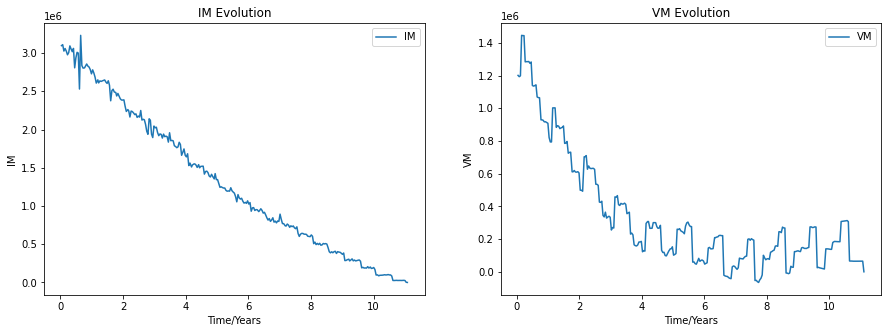

In [59]:
time = report_im_evolution.dataAsReal(8)
avgDim = report_im_evolution.dataAsReal(4)

time2 = report_vm_evolution.dataAsReal(2)
colBalance = report_vm_evolution.dataAsReal(3)
# FIXME: fix #N/A in row 1 of the vm report, skip for now
time2 = time2[1:]
colBalance = colBalance[1:]

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=1, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, avgDim, label='IM')
ax0.set(xlabel='Time/Years')
ax0.set(ylabel='IM')
ax0.set_title('IM Evolution')
ax0.legend()

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(time2, colBalance, label='VM')
ax1.set(xlabel='Time/Years')
ax1.set(ylabel='VM')
ax1.set_title('VM Evolution')
ax1.legend()

plt.show()